<a href="https://colab.research.google.com/github/hariomvyas/Stance-Detection/blob/main/TweetAnalyticsUsingNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To access Twitter API

api_key = "<YOUR API KEY HERE>"
api_secret = "<YOUR API SECRET KEY HERE>"
access_token = "<YOUR ACCESS TOKEN HERE>"
access_token_secret = "<YOUR ACCESS TOKEN SECRET HERE>"

In [ ]:
data = "/content/CuratedList.csv"
training_data = "/content/TweetDatasetNLPTraining.csv"

In [ ]:
# Importing required libraries

import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


* target: the polarity of the tweet (positive or negative)
* ids: Unique id of the tweet
* date: the date of the tweet
* flag: It refers to the query. If no such query exists then it is NO QUERY.
* user: It refers to the name of the user that tweeted
* text: It refers to the text of the tweet

Reference: https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/

In [ ]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv(training_data, encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
1256314,4,1997463945,Mon Jun 01 16:53:48 PDT 2009,NO_QUERY,MANDY_my_melody,@TimEssary have funn. wish i was there but......
1304350,4,2010303225,Tue Jun 02 17:09:20 PDT 2009,NO_QUERY,pameladetlor,@bigeasylivin Thanks It's not as pretty today...
1409942,4,2056136838,Sat Jun 06 10:35:36 PDT 2009,NO_QUERY,PaidModels,PM #14563 (Oscar Rabeiro) said: hey all! time ...
785115,0,2324337744,Thu Jun 25 02:54:37 PDT 2009,NO_QUERY,saaaaaarah15,i dont know how i'm gonna get up early for sch...
1573059,4,2189034875,Mon Jun 15 23:05:44 PDT 2009,NO_QUERY,MikeMayer,@unaffected Further reading: http://is.gd/13bl...


In [ ]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Columns/Features in data
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
# Length of dataset
print("Length of data is ", len(df))

Length of data is  1600000


In [ ]:
# Shape of data
df.shape

(1600000, 6)

In [ ]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
# Datatypes of all columns
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [ ]:
# Checking for null values
np.sum(df.isnull().any(axis=1))

0

In [ ]:
# Rows and columns in dataset
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [ ]:
# Checking unique target values
df['target'].unique()

array([0, 4])

In [ ]:
# Checking the number of target values
df['target'].nunique()

2

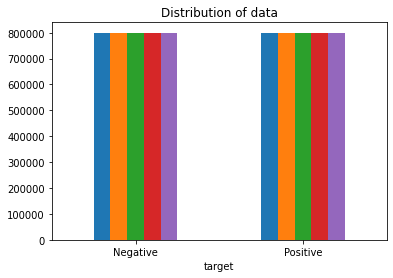

In [ ]:
# Data visualization of target variables

# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

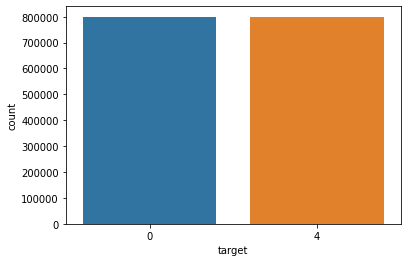

In [ ]:
import seaborn as sns
sns.countplot(x='target', data=df)

### Data Preprocessing

In [ ]:
# Selecting the text and Target column for our further analysis
data=df[['text','target']]

In [ ]:
# Replacing the values to ease understanding (Assingning 1 to Positive Statement 4)
data['target'] = data['target'].replace(4,1)

<ipython-input-18-b30e93fdfca4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [ ]:
# Printing unique values of target variables
data['target'].unique()

array([0, 1])

In [ ]:
# Separating positive and negative tweets
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [ ]:
# Taking one fourth data so we can run on our machine locally
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [ ]:
# Combining positive and negative tweets
dataset = pd.concat([data_pos, data_neg])

In [ ]:
# Making statement text in lower case
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [ ]:
# Defining set containing all stopwords in English
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
# Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [ ]:
# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [ ]:
# Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [ ]:
# Clenaing and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [ ]:
# Cleaning and removing numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [ ]:
# Getting tokenization of tweet text
from nltk.tokenize import RegexpTokenizer, word_tokenize, TweetTokenizer,
# tokenizer = RegexpTokenizer(r'w+')
tokenizer = TweetTokenizer()
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [ ]:
# Applying Stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [ ]:
# Applying Lemmatizer

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [ ]:
# Separating input feature and label

X=data.text
y=data.target

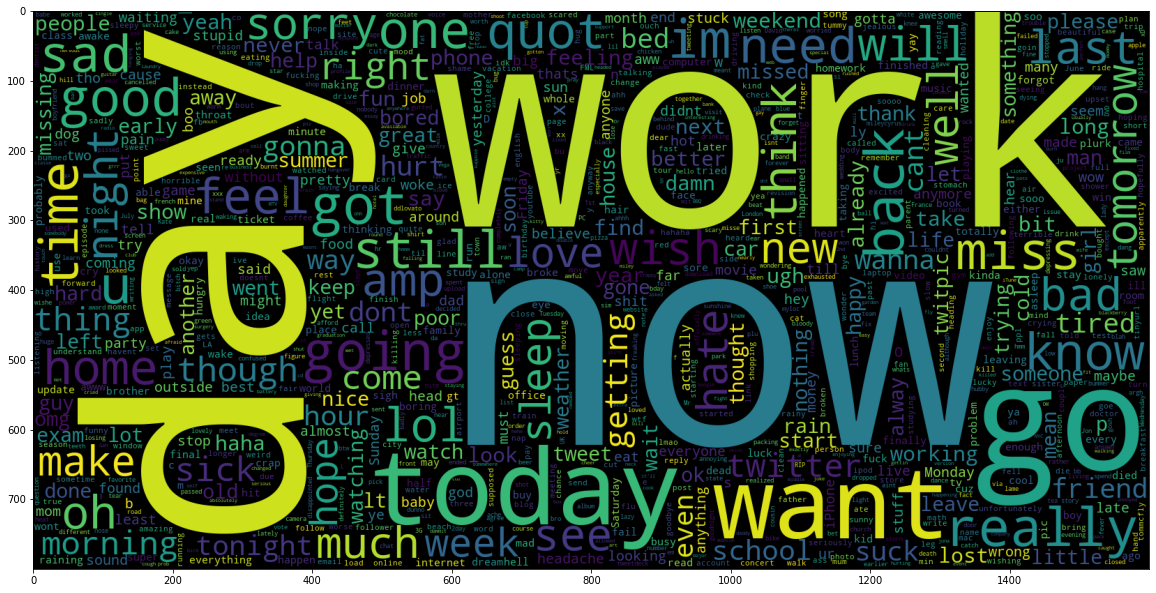

In [ ]:
# Plotting a cloud of words for negative tweets

data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

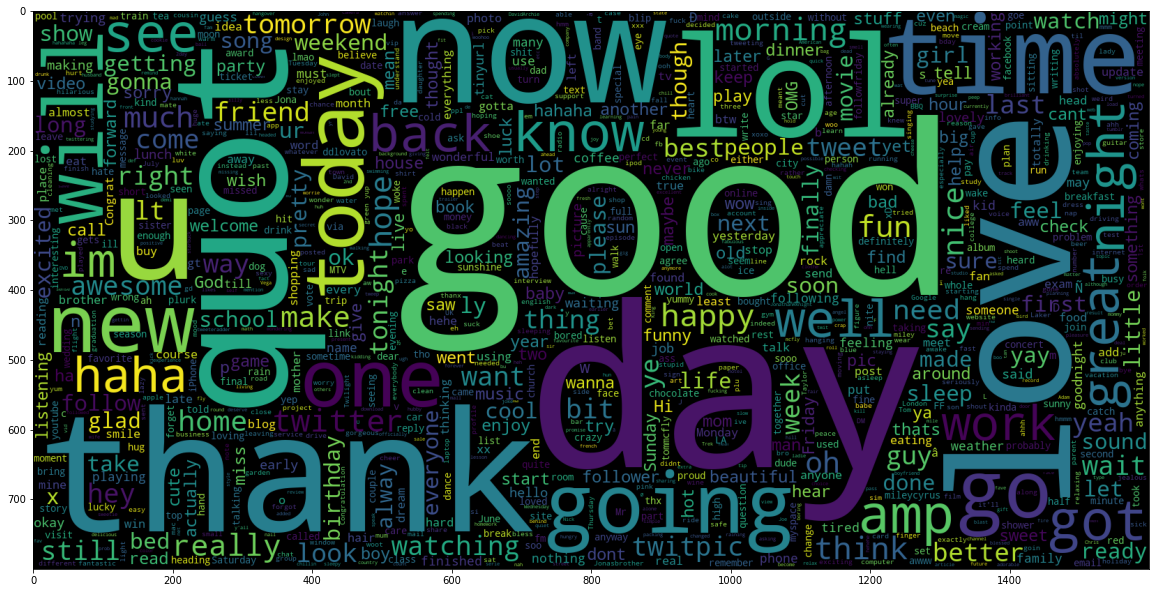

In [ ]:
# Plotting a cloud of positive tweets

data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [ ]:
# Splitting data into training and testing subset

# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

#### Transforming dataset using TF-IDF Vectorizer

In [ ]:
# Fitting the TF-IDF Vectorizer

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000


In [ ]:
# Transforming the data using TF-IDF Vectorizer

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

### Evaluating our Model

In [ ]:
# Function for Evaluating our model

def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Model Building

* Bernoulli Naive Bayes
* SVM (Support Vector Machine)
* Logistic Regression

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



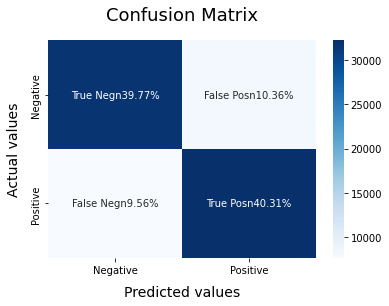

In [ ]:
# Model 1

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

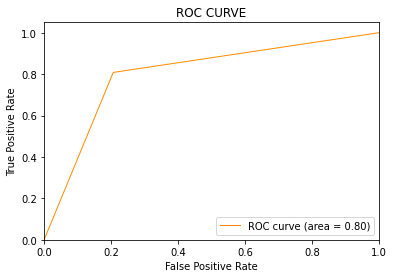

In [ ]:
# Plotting the ROC-AUC Curve for model-1

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     40100
           1       0.81      0.82      0.82     39900

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



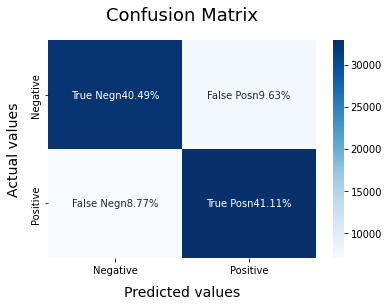

In [ ]:
# Model 2

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

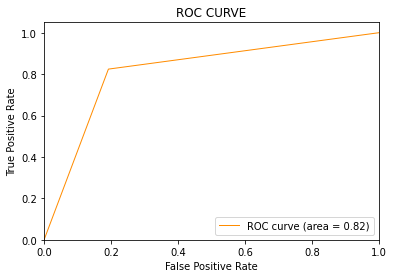

In [ ]:
# Plotting the ROC-AUC Curve for model-2

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     40100
           1       0.82      0.84      0.83     39900

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



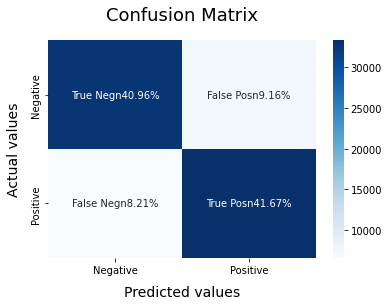

In [ ]:
# Model 3

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

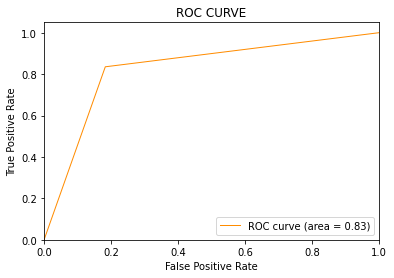

In [ ]:
# Plotting the ROC-AUC Curve for model-3

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# Now Testing all of the above things on Our Tweet Data

In [ ]:
# Importing our tweet dataset

DATASET_ENCODING = "ISO-8859-1"
data = pd.read_csv("/content/CuratedList.csv", encoding=DATASET_ENCODING)
data.sample(5)

,tweet_id,author_id,username,author_followers,author_tweets,author_description,text,created_at,name,profile_image_url,City,State,CategoryOfUser,UserType.x,UserType.y,UserTypeListsAgg
29953,29954,1.949030e+07,zagush,2059,48188,principal planner for capital development @rip...,"Pain au Chocolate, Hot Chocolate, and dozen+ M...",2017-10-22 10:19:32+00:00,Zachary Agush,http://pbs.twimg.com/profile_images/6322846161...,Providence,RI,NaN,NaN,NaN,NaN
5362,5363,9.440000e+17,keenwithgreen,707,945,#grateful to have been to #hell and back so th...,#WinnieThePoohDay #ThursdayThoughts #AmazonHQ2...,2018-01-19 00:03:07+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36793,36794,1.529054e+07,walterlmcleod,8390,8880,genx. 321 ppm. creator of carbon creed + clean...,Virginia continues its rise as the data/tech c...,2019-06-28 13:15:24+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31073,31074,1.655196e+08,dkeramidas,553,5374,director of it @uoftmedicine. enabling canada'...,Regardless of whether you want Amazon to set u...,2017-10-23 13:40:58+00:00,Dimitris Keramidas,http://pbs.twimg.com/profile_images/7717981755...,Toronto,Canada,NaN,NaN,NaN,NaN
17949,17950,2.953824e+09,clanghoff1,2192,171777,"teacher, parent, public school aficionado sinc...",Coulda been Boston! #AmazonHQ2 https://t.co/ex...,2018-11-15 03:25:07+00:00,Christine Langhoff,http://pbs.twimg.com/profile_images/5740133421...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset = data[["tweet_id", "username", "text"]]

In [ ]:
dataset.shape

(39950, 3)

In [ ]:
dataset

,tweet_id,username,text
0,1,johnpullum,- @Amazon #AmazonHQ2 narrowed its search for t...
1,2,carlquintanilla,- @HPSInsight has an analysis of where #amazon...
2,3,detroitcp,- Chad Livengood writes: On https://t.co/UKWMO...
3,4,profgalloway,"- Since âpulling outâ Amazon has 1,577 new..."
4,5,bezostown,! Chicago âattempted to appeal personally to...
...,...,...,...
39945,39946,goodjobsfirst,Zillow estimates rents in Boston will rise $48...
39946,39947,goodjobsfirst,Zillow estimates that rents in Denver will ris...
39947,39948,goodjobsfirst,Zillow estimates that rents in Los Angeles wil...
39948,39949,seattletimes,"Zillow estimates that rents in Nashville, 1 of..."


In [ ]:
# Making statement text in lower case
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

<ipython-input-50-c03a6ecffa7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text']=dataset['text'].str.lower()


39945    zillow estimates rents in boston will rise $48...
39946    zillow estimates that rents in denver will ris...
39947    zillow estimates that rents in los angeles wil...
39948    zillow estimates that rents in nashville, 1 of...
39949    zostaje mi aby dopracowaä oko. podoba siä ko...
Name: text, dtype: object

In [ ]:
# Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

<ipython-input-51-ae9c914f3961>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))


0    - @amazon #amazonhq2 narrowed search 2nd headq...
1    - @hpsinsight analysis #amazonhq2 may go â l...
2    - chad livengood writes: https://t.co/ukwmodgo...
3    - since âpulling outâ amazon 1,577 new hir...
4    ! chicago âattempted appeal personally ceo j...
Name: text, dtype: object

In [ ]:
# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

<ipython-input-52-bffa852f0a8b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))


39945    zillow estimates rents boston rise 485 month a...
39946    zillow estimates rents denver rise 717 month a...
39947    zillow estimates rents los angeles rise 740 mo...
39948    zillow estimates rents nashville 1 20 finalist...
39949    zostaje mi aby dopracowaä oko podoba siä kom...
Name: text, dtype: object

In [ ]:
# Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

<ipython-input-53-59f098a9bfb4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))


39945    zillow estimates rents boston rise 485 month a...
39946    zillow estimates rents denver rise 17 month am...
39947    zillow estimates rents los angeles rise 740 mo...
39948    zillow estimates rents nashville1 20 finalists...
39949    zostaje mi aby dopracowaä oko podoba siä kom...
Name: text, dtype: object

In [ ]:
# Clenaing and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

<ipython-input-54-5d6b5d6e6c48>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))


39945    zillow estimates rents boston rise 485 month a...
39946    zillow estimates rents denver rise 17 month am...
39947    zillow estimates rents los angeles rise 740 mo...
39948    zillow estimates rents nashville1 20 finalists...
39949    zostaje mi aby dopracowaä oko podoba siä kom...
Name: text, dtype: object

In [ ]:
# Cleaning and removing numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

<ipython-input-55-cf1d944e7f9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))


39945    zillow estimates rents boston rise  month amaz...
39946    zillow estimates rents denver rise  month amaz...
39947    zillow estimates rents los angeles rise  month...
39948    zillow estimates rents nashville  finalists am...
39949    zostaje mi aby dopracowaä oko podoba siä kom...
Name: text, dtype: object

In [ ]:
# Getting tokenization of tweet text
from nltk.tokenize import RegexpTokenizer, word_tokenize, TweetTokenizer
# tokenizer = RegexpTokenizer(r'w+')
tokenizer = TweetTokenizer()
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

<ipython-input-56-c2ba72eec21f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(tokenizer.tokenize)


0    [amazon, amazonhq, narrowed, search, nd, headq...
1    [hpsinsight, analysis, amazonhq, may, go, â, ...
2    [chad, livengood, writes, httpstcoukwmodgosk, ...
3    [since, â, , , pulling, outâ, , , amazon, ...
4    [chicago, â, , , attempted, appeal, personal...
Name: text, dtype: object

In [ ]:
# Applying Stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

<ipython-input-57-1d825e8f4d35>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))


0    [amazon, amazonhq, narrowed, search, nd, headq...
1    [hpsinsight, analysis, amazonhq, may, go, â, ...
2    [chad, livengood, writes, httpstcoukwmodgosk, ...
3    [since, â, , , pulling, outâ, , , amazon, ...
4    [chicago, â, , , attempted, appeal, personal...
Name: text, dtype: object

In [ ]:
# Applying Lemmatizer

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

<ipython-input-58-2ad129dfd88e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))


0    [amazon, amazonhq, narrowed, search, nd, headq...
1    [hpsinsight, analysis, amazonhq, may, go, â, ...
2    [chad, livengood, writes, httpstcoukwmodgosk, ...
3    [since, â, , , pulling, outâ, , , amazon, ...
4    [chicago, â, , , attempted, appeal, personal...
Name: text, dtype: object

In [ ]:
dataset.shape

(39950, 3)

In [ ]:
data["text"]

0        - @Amazon #AmazonHQ2 narrowed its search for t...
1        - @HPSInsight has an analysis of where #amazon...
2        - Chad Livengood writes: On https://t.co/UKWMO...
3        - Since âpulling outâ Amazon has 1,577 new...
4        ! Chicago âattempted to appeal personally to...
                               ...                        
39945    Zillow estimates rents in Boston will rise $48...
39946    Zillow estimates that rents in Denver will ris...
39947    Zillow estimates that rents in Los Angeles wil...
39948    Zillow estimates that rents in Nashville, 1 of...
39949    Zostaje mi aby dopracowaÄ oko. Podoba siÄ ko...
Name: text, Length: 39950, dtype: object

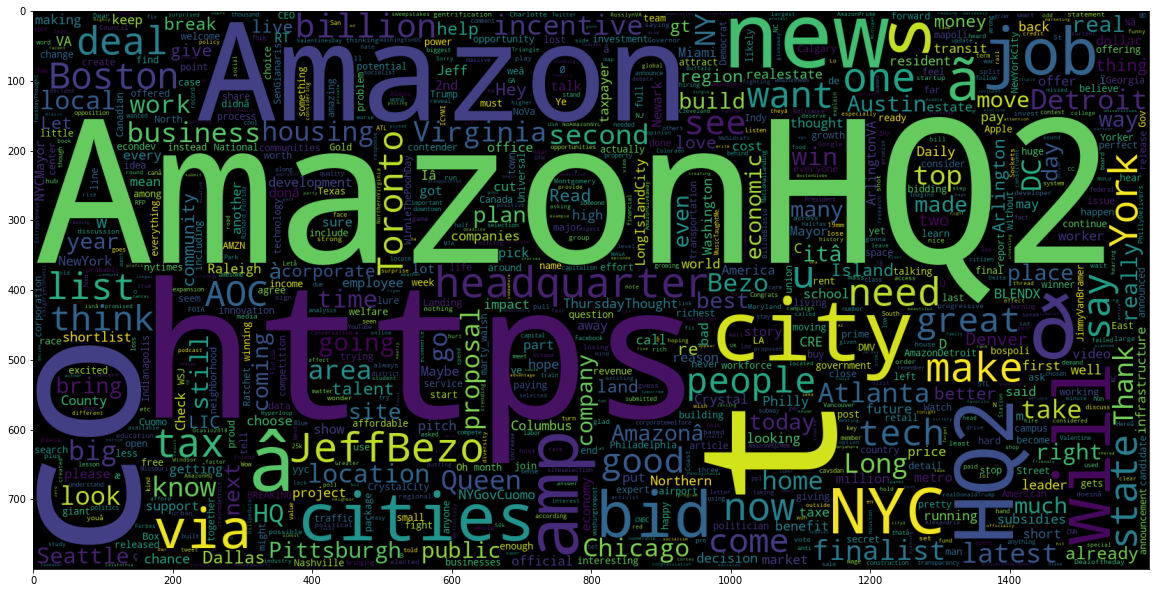

In [ ]:
# Plotting a cloud of words for tweets

data_cloud = data['text'][:39950]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_cloud))
plt.imshow(wc)

In [ ]:
X_test = data['text']

In [ ]:
# Transforming the data using TF-IDF Vectorizer
X_test  = vectoriser.transform(X_test)

In [ ]:
# Function for Evaluating our model

def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
# Model 1

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
#model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

In [ ]:
output1 = pd.DataFrame(list(zip(X_test, y_pred1)), columns=["text", "output"])

In [ ]:
output1

,text,output
0,"(0, 497316)\t0.15686841372418206\n (0, 4957...",1
1,"(0, 474176)\t0.11030927633721176\n (0, 3641...",0
2,"(0, 487251)\t0.2443230938823408\n (0, 47205...",1
3,"(0, 492117)\t0.08760177938740735\n (0, 4638...",1
4,"(0, 477632)\t0.22906941122928\n (0, 477625)...",1
...,...,...
39945,"(0, 481578)\t0.1767199181728472\n (0, 47907...",1
39946,"(0, 481578)\t0.16311167469648757\n (0, 4790...",1
39947,"(0, 481578)\t0.15358598649148883\n (0, 4790...",1
39948,"(0, 490941)\t0.17003906729065774\n (0, 4908...",1


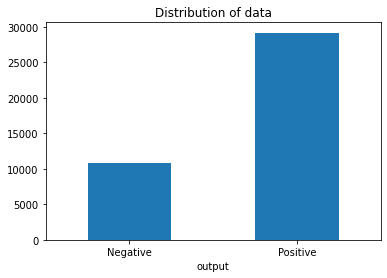

In [ ]:
# Data visualization of target variables

# Plotting the distribution for dataset.
ax = output1.groupby('output').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

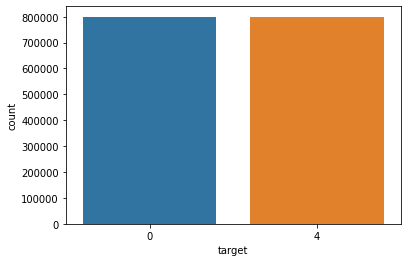

In [ ]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [ ]:
# Model 2

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
# model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

In [ ]:
output2 = pd.DataFrame(list(zip(data["text"], y_pred2)), columns=["text", "output"])
output2

,text,output
0,- @Amazon #AmazonHQ2 narrowed its search for t...,1
1,- @HPSInsight has an analysis of where #amazon...,1
2,- Chad Livengood writes: On https://t.co/UKWMO...,1
3,"- Since âpulling outâ Amazon has 1,577 new...",1
4,! Chicago âattempted to appeal personally to...,1
...,...,...
39945,Zillow estimates rents in Boston will rise $48...,0
39946,Zillow estimates that rents in Denver will ris...,0
39947,Zillow estimates that rents in Los Angeles wil...,0
39948,"Zillow estimates that rents in Nashville, 1 of...",0


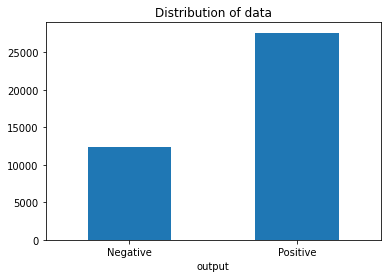

In [ ]:
# Data visualization of target variables

# Plotting the distribution for dataset.
ax = output2.groupby('output').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

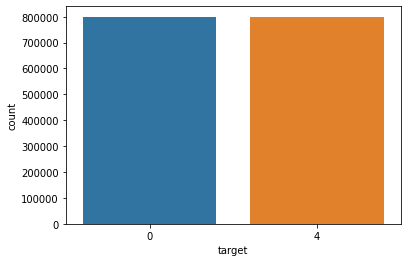

In [ ]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [ ]:
# Model 3

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
# model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

In [ ]:
output3 = pd.DataFrame(list(zip(data["text"], y_pred3)), columns=["text", "output"])
output3

,text,output
0,- @Amazon #AmazonHQ2 narrowed its search for t...,1
1,- @HPSInsight has an analysis of where #amazon...,1
2,- Chad Livengood writes: On https://t.co/UKWMO...,1
3,"- Since âpulling outâ Amazon has 1,577 new...",1
4,! Chicago âattempted to appeal personally to...,1
...,...,...
39945,Zillow estimates rents in Boston will rise $48...,0
39946,Zillow estimates that rents in Denver will ris...,0
39947,Zillow estimates that rents in Los Angeles wil...,0
39948,"Zillow estimates that rents in Nashville, 1 of...",1


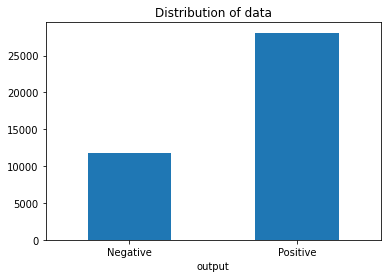

In [ ]:
# Data visualization of target variables

# Plotting the distribution for dataset.
ax = output3.groupby('output').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

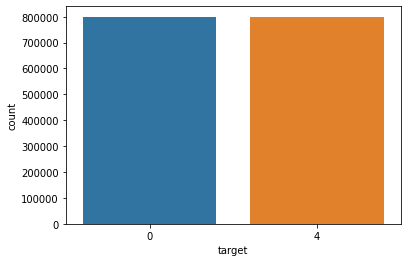

In [ ]:
import seaborn as sns
sns.countplot(x='target', data=df)